### №1 Section for importing main libraries and defining main function

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics
from PIL import Image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential, load_model
from skimage.transform import resize
from tensorflow.keras.preprocessing import image as lb
from tensorflow.keras.applications.vgg16 import preprocess_input

def plot2figs(image1, image2, title):
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(image1, cmap=plt.cm.gray)
    plt.title('Original image')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(image2, cmap=plt.cm.gray)
    plt.title(title)
    plt.show()

### №2 Section for loading image

In [9]:
image = Image.open(os.path.join('../bin_data', 'collagen_color.png'))

### №3 Section for CNN feature extraction

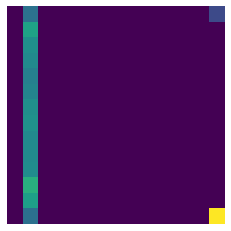

In [10]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

target_size=(224, 224)

image = np.asarray(image)
img = resize(image, target_size)
x = lb.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_tensor = preprocess_input(x)

block4_pool_features = model.predict(img_tensor)
plt.imshow(block4_pool_features[0, :, :, 9], cmap='viridis')
plt.axis('off')
plt.show()